Intercept (theta 0): 
 [152.83495859]
Coefficients (theta 1): 
 [[952.9063637]]
Mean squared error: 3938.97


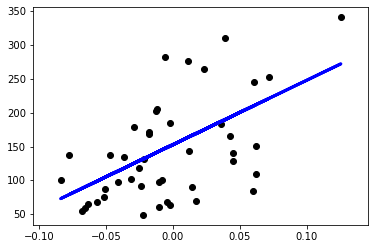

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Select 10% for testing, 90% for training
data_len = len(diabetes.target)
n_test_samples = int(np.rint(0.1*data_len))
n_train_samples = int(np.rint(0.9*data_len))
idx_test = np.arange(0, n_test_samples)
idx_train = np.arange(n_test_samples, data_len)

# extract the bmi feature
X_test = diabetes.data[idx_test,np.newaxis,2]
X_train = diabetes.data[idx_train,np.newaxis,2]
y_test = diabetes.target[idx_test,np.newaxis]
y_train = diabetes.target[idx_train,np.newaxis]

In [9]:
def h_lin(X, theta):
    h = np.array([theta[0] + theta[1]*value for value in X])                                                                                           
    return h

In [4]:
def loss_L2(h, y):
    m = len(y)
    squared_errors_sum = sum(np.square(h - y))
    mean_squared_error = (1/(2*m)) * squared_errors_sum   
    
    return mean_squared_error[0]

1946.8770201779544


In [11]:
# Calculate coefficient gradients (partial derivatives)
def gradient_batch(theta, X, y):
    m = len(y)
    theta = np.array(theta)
    grad_0 = 1/m * sum(theta[0]+theta[1]*X-y)
    grad_1 = 1/m * sum((theta[0]+theta[1]*X-y)*X)
    grad = np.array([grad_0,grad_1])
    
    return grad

array([[-5.28327468e+01],
       [-1.12995982e-02]])

In [12]:
loss_stop_threshold = 0.1
alpha = 0.7

# set initial theta values (at random point)
theta = np.array([100, 2])
theta = theta[:, np.newaxis]

def batch_gd( X, y, old_theta, alpha, loss_stop_threshold):
    """Batch gradient descent training for linear function with a single variable
    """

    theta = old_theta.copy()
    
    # Calculate initial loss value
    loss = loss_L2(h_lin(X,theta), y)
    
    # Update rule
    new_theta = theta - alpha*gradient_batch(theta, X_train, y_train)
    new_loss = loss_L2(h_lin(X,new_theta), y)

    # Repeat update until convergence
    while abs(new_loss - loss) >= loss_stop_threshold:
        theta = batch_gd(X, y, new_theta, alpha, loss_stop_threshold)
        return theta
        
    print(f'Gradient descent algorithm stopped at loss {loss}, with coefficients: {theta}')
    return theta
        
theta = batch_gd(X_train, y_train, theta, alpha, loss_stop_threshold)

GD stopped at loss 1974.029562125493, with coefficients: [[152.90686506]
 [787.69134875]]


Intercept (theta 0): 
 [152.90686506]
Coefficients (theta 1): 
 [787.69134875]
Mean squared error: 3969.99


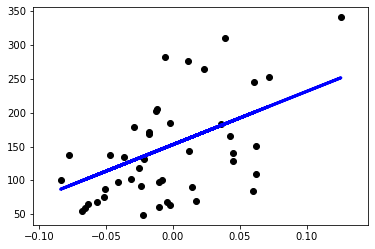

In [7]:
y_pred = h_lin(X_test, theta)

# The coefficients
print('Intercept (theta 0): \n', theta[0])
print('Coefficients (theta 1): \n', theta[1])

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# Plot outputs using test data
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()

In [ ]:
# For comparison purposes, create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Intercept (theta 0): \n', regr.intercept_)
print('Coefficients (theta 1): \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.show()